# Evaluation, decision trees and overfitting

Decision trees are very expressive models. They can adjust to the training data. This can be a powerful feature, but it can also lead to overfitting. In other words, the model may perform well on the training data but not generalise well and fail on test data. To avoid overfitting we must make sure our tree does not have too thin ends. In other words, leaves and terminal nodes should have a minimum number of examples for statistical support.

We can use holdout and cross-validation for observing this very important phenomenon.

Load the `german_credit_data.csv`(found in kaggle) and separate into numerical descriptors only `X` (Age, Job, Credit amount and Duration) and target attribute (class) `y`. Note that we cannot use categorical descriptors directly.

In [33]:
import pandas as pd
import numpy as np

d=pd.read_csv('../Dados/german_credit_data.csv')
#X=np.array(d[['Age','Job','Credit amount','Duration']])
#y=np.array(d.loc[:,['Risk']])
X=d[['Age','Job','Credit amount','Duration']]
y=d.loc[:,['Risk']]

522

## Exercises

**Exercise 1:** Build a decision tree for this data. Use the whole data without preprocessing. Classify the first 10 training examples using the tree. Calculate accuracy directly for the whole data. Note this is training data only. No holdout yet.

In [48]:
# Ex 1

from sklearn import tree

treemod = tree.DecisionTreeClassifier()
treemod.fit(X,y)
treemod.predict(X.iloc[0:10,:])

yhat=treemod.predict(X)
Acc=sum(y==yhat)/len(y)
Acc

1.0

**Exercise 2:** What is the tree we obtained? Is it overfitting?  What are the default hyperparameters? Try different hyp

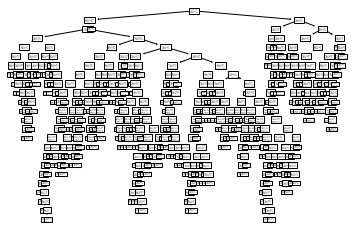

In [52]:
# We can plot the tree and see it looks very detailed. That is a sign that tree is probably overfitting
dump=tree.plot_tree(treemod)

In [62]:
# to make sure it is, we will use holdout and compare train and test accuracy.

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X1, X2, y1, y2 = train_test_split(X, y, train_size=0.8)

# fit the model on the training set X1 and leave X2 for testing
treemod.fit(X1, y1)

# evaluate the model on the second set of data
yhat_train = treemod.predict(X1)
yhat_test = treemod.predict(X2)

accuracy_score(y1, yhat_train), accuracy_score(y2, yhat_test)

(1.0, 0.69)

The test accuracy is much lower. You can repeat the holdout a number of times. Each time it builds a different split and the values of acuracy may change. 

We will now try to improve the tree by pruning it. We saw above that the tree is a bit complex and deep. So we will try to cut it short.

In [63]:
treemod_md = tree.DecisionTreeClassifier(max_depth=5)
treemod_md.fit(X1,y1)
treemod.fit(X1, y1)

ymdhat = treemod_md.predict(X2)
yhat = treemod.predict(X2)

accuracy_score(y2, yhat), accuracy_score(y2, ymdhat)


(0.695, 0.775)

The tree improved. How does the test accuracy change with depth?

In [77]:
# we define a function to make repetition easier
# the function obtains the accuracy on the test set for a given split and tree depth
def depth2acc(X1,X2,y1,y2,max_depth=None):
    mod=tree.DecisionTreeClassifier(max_depth=max_depth)
    mod.fit(X1,y1)
    yhat=mod.predict(X2)
    return accuracy_score(y2,yhat)

# here is an example
depth2acc(X1,X2,y1,y2,5)

0.775

In [79]:
for i in [1,2,3,5,7,10,15,20,30,40,50,60,70,100]:
    print(i,depth2acc(X1,X2,y1,y2,i))

1 0.735
2 0.755
3 0.78
5 0.775
7 0.74
10 0.69
15 0.675
20 0.675
30 0.7
40 0.68
50 0.685
60 0.69
70 0.68
100 0.69


**Exercise 3** We can see the values. Can we plot them? Plot the values of accuracy.

For that we need them in a single data structure like an array. For that we will use the `map` operator which takes a function for the first argument and a list of arguments for the second. The function can be any pyhton function, but it may be convenient to wrap the function as one with the argument that you want. One computer science way for doing that is with a `lambda` structure. 

In [90]:
# build a list from 1 to 100 with step 2
depths=range(1,100,2)
# lambda applies each of the depths to the depth2acc function. The result is transformed into a list.
# a list os not the same as an array, but it can be used in some situations.
accs=list(map(lambda i:depth2acc(X1,X2,y1,y2,i),depths))


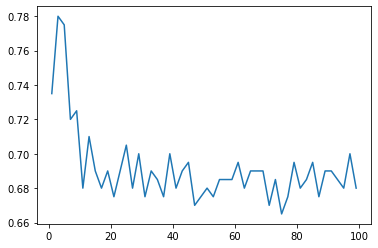

In [93]:
from matplotlib.pyplot import plot
plot(depths,accs)

We see that the accuracy is maximum with a very low depth (find out how python can give you the precise depth for the maximum). After the maximum it frops very quickly and we see the effect of overfitting. 

**Exercise 4:** We observe some unstability with the accuracy. Use crossvalidation instead of holdout and see if the line gets more stable (warning it takes $k$ times more to run)

**Exercise 5:** Study the evolution of accuracy for other hyperparameters of the Decision Tree:
(you can check https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- min_samples_leaf
- min_samples_split
- min_impurity_decrease
- ccp_alpha (complexity)

**Exercise 6:** Study how accuracy changes with the number of neighbours for the training and the test data with the kNN approach. Make a split and obtain an accuracy estimate for train and another for test for $k$ ranging from 1 to 100.